In [ ]:
print("hlo")

hlo


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

city_list = ["New York", "Manchester", "California", "Munich", "Bombay", 
             "Sydeny", "London", "Moscow", "Dubai", "Tokyo"]

job_list = ["Software Development Engineer", "Research Engineer", "Test Engineer", 
            "Software Development Engineer-II", "Python Developer", "Back End Developer",
            "Front End Developer", "Data Scientist", "IOS Developer", "Android Developer"]

cmp_list = ["Amazon", "Google", "Infosys", "Mastercard", "Microsoft", 
            "Uber", "IBM", "Apple", "Wipro", "Cognizant"]

data = []
for i in range(1000):
  
    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Full Time", "Intern"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)
    
    data.append([company, job, city, salary, employment, rating])
    
data = pd.DataFrame(data, columns=["Company Name", "Employee Job Title",
                                   "Employee Work Location",  "Employee Salary", 
                                   "Employment Status", "Employee Rating"])

In [ ]:
data.head()

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
0,Uber,Software Development Engineer-II,Manchester,602000,Full Time,0.0
1,Uber,IOS Developer,Sydeny,857000,Full Time,3.3
2,Mastercard,Back End Developer,Bombay,274000,Full Time,3.9
3,Mastercard,Software Development Engineer-II,Tokyo,246000,Intern,4.8
4,IBM,Python Developer,Manchester,617000,Full Time,1.9


In [ ]:
#1 n-largest values in a series

In [ ]:
n = 6
data.nlargest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
108,Cognizant,Back End Developer,Munich,999000,Full Time,3.4
149,Google,IOS Developer,Bombay,998000,Full Time,4.0
751,Google,Research Engineer,California,998000,Intern,4.8
835,Apple,Test Engineer,Munich,998000,Full Time,0.1
91,Google,Software Development Engineer-II,Moscow,997000,Intern,0.2
350,Wipro,Back End Developer,California,997000,Full Time,0.8
566,Microsoft,Software Development Engineer-II,Dubai,997000,Intern,3.0


In [ ]:
#2 n-smallest values in a series

In [ ]:
n = 7
data.nsmallest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
435,Uber,Back End Developer,Dubai,1000,Full Time,4.9
411,Mastercard,Front End Developer,Sydeny,2000,Full Time,5.0
551,Amazon,Python Developer,London,4000,Intern,4.4
641,Infosys,Android Developer,New York,4000,Full Time,3.7
391,Cognizant,Data Scientist,Bombay,5000,Intern,0.7
371,Uber,Test Engineer,Sydeny,7000,Full Time,1.4
266,Apple,Software Development Engineer-II,Bombay,8000,Full Time,3.5


In [ ]:
###3 CrossTabs

In [ ]:
pd.crosstab(data["Company Name"], data["Employee Work Location"])

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,16,9,8,9,8,5,5,7,10,6
Apple,10,11,15,5,7,10,17,9,4,15
Cognizant,12,9,12,3,9,11,13,12,8,7
Google,10,7,9,19,10,9,11,9,9,11
IBM,14,14,7,10,12,14,7,14,11,15
Infosys,13,15,13,12,10,6,8,14,13,6
Mastercard,9,11,10,8,9,10,5,13,8,11
Microsoft,9,8,9,10,12,8,10,10,8,5
Uber,9,5,10,6,9,12,8,5,15,13


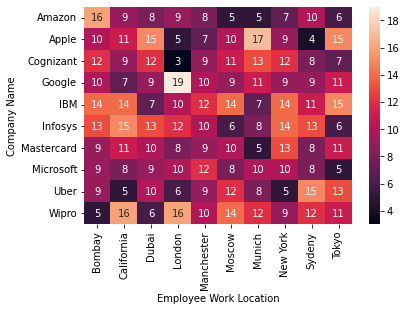

In [ ]:
result_crosstab = pd.crosstab(data["Company Name"], data["Employee Work Location"])
sns.heatmap(result_crosstab, annot=True)

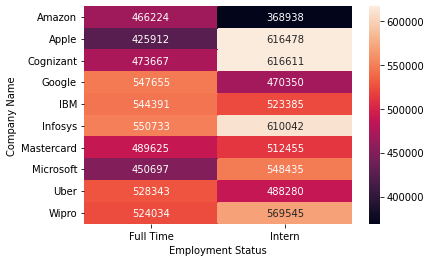

In [ ]:
result_crosstab = pd.crosstab(index = data["Company Name"], 
                              columns=data["Employment Status"], 
                              values = data["Employee Salary"], 
                              aggfunc=np.mean)
                              
sns.heatmap(result_crosstab, annot = True, fmt = 'g')


In [ ]:
#4 Pivot Table

In [ ]:
pd.pivot_table(data, 
               index=["Company Name"], 
               columns=["Employee Work Location"], 
               aggfunc='size', 
               fill_value=0)

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,16,9,8,9,8,5,5,7,10,6
Apple,10,11,15,5,7,10,17,9,4,15
Cognizant,12,9,12,3,9,11,13,12,8,7
Google,10,7,9,19,10,9,11,9,9,11
IBM,14,14,7,10,12,14,7,14,11,15
Infosys,13,15,13,12,10,6,8,14,13,6
Mastercard,9,11,10,8,9,10,5,13,8,11
Microsoft,9,8,9,10,12,8,10,10,8,5
Uber,9,5,10,6,9,12,8,5,15,13


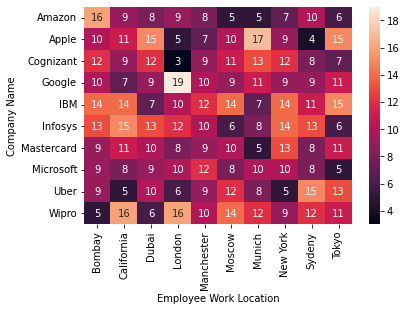

In [ ]:
result_pivot = pd.pivot_table(data, 
                              index=["Company Name"], 
                              columns=["Employee Work Location"], 
                              aggfunc='size', 
                              fill_value=0)
               
sns.heatmap(result_pivot, annot = True, fmt = 'g')

In [ ]:
#5 Handling Duplicated Data

In [ ]:
data.duplicated(keep = "first")
"""
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool
"""

'\n0    False\n1    False\n2    False\n3    False\n4    False\n5    False\n6    False\n7    False\n8     True\n9     True\ndtype: bool\n'

In [ ]:
new_data=[data.duplicated(keep = False)]

In [ ]:
data[~data.duplicated(keep = False)]

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
0,Uber,Software Development Engineer-II,Manchester,602000,Full Time,0.0
1,Uber,IOS Developer,Sydeny,857000,Full Time,3.3
2,Mastercard,Back End Developer,Bombay,274000,Full Time,3.9
3,Mastercard,Software Development Engineer-II,Tokyo,246000,Intern,4.8
4,IBM,Python Developer,Manchester,617000,Full Time,1.9
...,...,...,...,...,...,...
995,Microsoft,IOS Developer,Sydeny,60000,Full Time,1.3
996,Infosys,Data Scientist,Dubai,574000,Intern,4.5
997,Google,Test Engineer,California,409000,Intern,4.0
998,Apple,Software Development Engineer-II,New York,598000,Full Time,1.4


In [ ]:
data.duplicated(subset=["Company Name", "Employee Work Location"], keep = False)

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

In [ ]:
data[data.duplicated(subset=["Company Name", "Employee Work Location"], keep = False)]


,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
0,Uber,Software Development Engineer-II,Manchester,602000,Full Time,0.0
1,Uber,IOS Developer,Sydeny,857000,Full Time,3.3
2,Mastercard,Back End Developer,Bombay,274000,Full Time,3.9
3,Mastercard,Software Development Engineer-II,Tokyo,246000,Intern,4.8
4,IBM,Python Developer,Manchester,617000,Full Time,1.9
...,...,...,...,...,...,...
995,Microsoft,IOS Developer,Sydeny,60000,Full Time,1.3
996,Infosys,Data Scientist,Dubai,574000,Intern,4.5
997,Google,Test Engineer,California,409000,Intern,4.0
998,Apple,Software Development Engineer-II,New York,598000,Full Time,1.4


In [ ]:
#Remove duplicates

In [ ]:
data.drop_duplicates(keep = "first")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
0,Uber,Software Development Engineer-II,Manchester,602000,Full Time,0.0
1,Uber,IOS Developer,Sydeny,857000,Full Time,3.3
2,Mastercard,Back End Developer,Bombay,274000,Full Time,3.9
3,Mastercard,Software Development Engineer-II,Tokyo,246000,Intern,4.8
4,IBM,Python Developer,Manchester,617000,Full Time,1.9
...,...,...,...,...,...,...
995,Microsoft,IOS Developer,Sydeny,60000,Full Time,1.3
996,Infosys,Data Scientist,Dubai,574000,Intern,4.5
997,Google,Test Engineer,California,409000,Intern,4.0
998,Apple,Software Development Engineer-II,New York,598000,Full Time,1.4


In [ ]:
data.drop_duplicates(subset=["Company Name", "Employee Work Location"], keep = False)

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
